# Video Game Sales

### Подключение библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [ ]:
vgs = pd.read_csv('vgsales.csv')

In [ ]:
vgs.head(10)

#### Описание данных

Этот набор данных содержит список видеоигр, продажи которых превысили 100 000 копий.

Name - Название игры

Platform - Платформа выпуска игр (например, PC, PS4 и т.д.)

Year - Год выпуска игры

Genre - Жанр игры

Publisher - Издатель игры

NA_Sales - Продажи в Северной Америке (в миллионах)

EU_Sales - Продажи в Европе (в миллионах)

JP_Sales - Продажи в Японии (в миллионах)

Other_Sales - Продажи в остальном мире (в миллионах)

Global_Sales - Общий объем продаж по всему миру.


##### Выведите размерность и краткую информацию о наборе данных

In [13]:
vgs.shape

(16598, 11)

In [7]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Выведите краткую статистическую информацию по набору данных

In [8]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
vgs.describe(include=['O'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


##### Проверьте набор данных на наличие пропущенных и дублирующих значений

In [10]:
print(vgs.isnull().sum())


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [13]:
vgs.duplicated().sum()

0

#### Напишите краткий вывод о наборе данных

In [ ]:
Все записи уникальные, отсутствуют дубликаты. Только есть пустые значения.

### Заполнение пустых записей

Удалите пропущенные значения по признаку Publisher, а по признаку Year - замените на среднее значение. Значения по полю Year преобразуйте в целый тип. Удалите признак Rank. После преобразований, убедитесь, что изменения сохранились в наборе данных.

In [16]:
vgs = vgs.dropna(subset=['Publisher'])


In [17]:
mean_year = vgs['Year'].mean()
vgs['Year'] = vgs['Year'].fillna(mean_year)



In [18]:
vgs['Year'] = vgs['Year'].astype(int)


In [19]:
vgs = vgs.drop(columns=['Rank'])


In [20]:
vgs.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [21]:
print(vgs.isnull().sum())

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [22]:
vgs.shape

(16540, 10)

In [23]:
print(vgs.info())


<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16540 non-null  object 
 1   Platform      16540 non-null  object 
 2   Year          16540 non-null  int32  
 3   Genre         16540 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16540 non-null  float64
 6   EU_Sales      16540 non-null  float64
 7   JP_Sales      16540 non-null  float64
 8   Other_Sales   16540 non-null  float64
 9   Global_Sales  16540 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB
None


### Анализ продаж видеоигр

#### 1. В каком году было выпущено больше всего игр? Выведите первые 10 записей.

In [24]:
print(vgs_clean['Year'].value_counts().head(10))


Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: count, dtype: Int64


<Axes: xlabel='Year'>

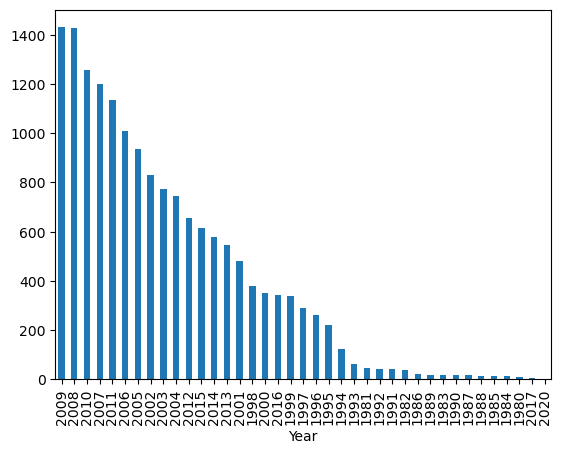

In [26]:
vgs_clean['Year'].value_counts(normalize=False).plot.bar()

In [27]:
print("Количество уникальных значений в Platform:", vgs['Platform'].nunique())
print("Количество уникальных значений в Genre:", vgs['Genre'].nunique()) 
print("Количество уникальных значений в Publisher:", vgs['Publisher'].nunique())


Количество уникальных значений в Platform: 31
Количество уникальных значений в Genre: 12
Количество уникальных значений в Publisher: 578


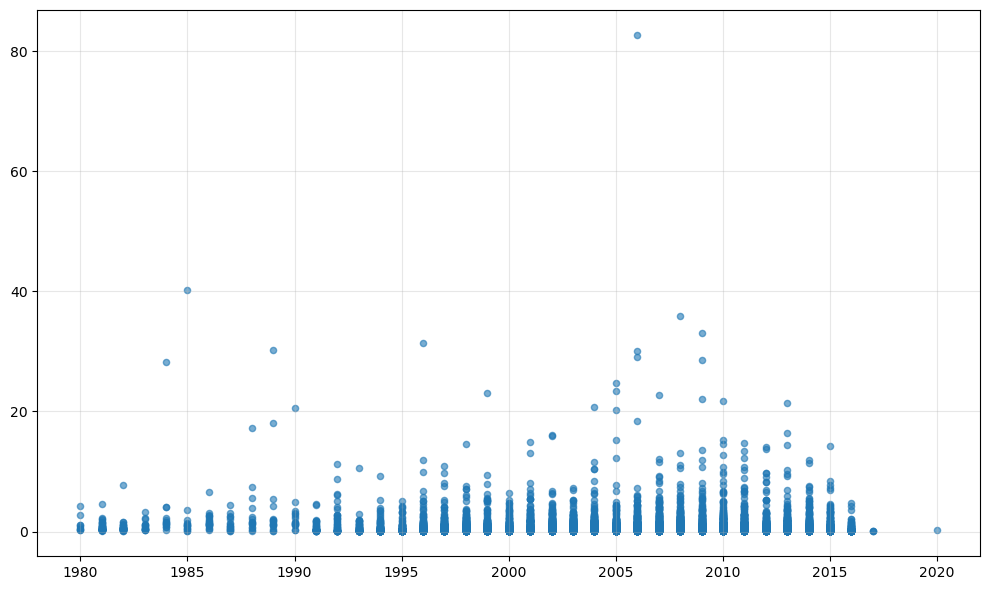

In [29]:
# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(vgs['Year'], vgs['Global_Sales'], alpha=0.6, s=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Получите среднюю стоимость продаж в Европе 

In [35]:
vgs['EU_Sales'].mean()


0.1468833131801693

#### 3. Получите максимальную стоимость продаж в Японии и вывведите полную информацию об игре с максимальной суммой продаж

In [37]:
vgs['JP_Sales'].max()

10.22

In [41]:
max_jp_sales = vgs['JP_Sales'].max()

vgs[vgs['JP_Sales'] == max_jp_sales].iloc[0]

Name            Pokemon Red/Pokemon Blue
Platform                              GB
Year                                1996
Genre                       Role-Playing
Publisher                       Nintendo
NA_Sales                           11.27
EU_Sales                            8.89
JP_Sales                           10.22
Other_Sales                          1.0
Global_Sales                       31.37
Name: 4, dtype: object

##### Выведите первые 10 записей с максимальными суммами продажам в Японии по годам

In [48]:
top_jp_games = vgs.loc[vgs.groupby('Year')['JP_Sales'].nlargest(10).reset_index(level=0, drop=True).index]
print(top_jp_games[['Name', 'Year', 'JP_Sales', 'Global_Sales']].head(10))


                 Name  Year  JP_Sales  Global_Sales
258         Asteroids  1980       0.0          4.31
544   Missile Command  1980       0.0          2.76
1766          Kaboom!  1980       0.0          1.15
1969         Defender  1980       0.0          1.05
2669           Boxing  1980       0.0          0.77
4025       Ice Hockey  1980       0.0          0.49
5366          Freeway  1980       0.0          0.34
6317           Bridge  1980       0.0          0.27
6896         Checkers  1980       0.0          0.24
239          Pitfall!  1981       0.0          4.50


#### 4. К какому жанру относится видеоигра "Brain Age 2: More Training in Minutes a Day" video game?

In [51]:
vgs[vgs['Name'] == 'Brain Age 2: More Training in Minutes a Day']['Genre'].iloc[0]

'Puzzle'

#### 5.  Каков объём продаж видеоигры «Grand Theft Auto: Vice City» по всему миру?

In [53]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']['Global_Sales']

24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

In [55]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City'][['Name', 'Platform', 'Year', 'Genre', 'Publisher', 
                                                                        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
13732,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04


#### 6. Выведите название видеоигры, которая имеет самые высокие продажи в Северной Америке.

In [57]:
 vgs.loc[vgs['NA_Sales'].idxmax(), 'Name']

'Wii Sports'

#### 7. Выведите видеоигры с самыми низкими продажами в мире

In [58]:
 vgs[vgs['Global_Sales'] == vgs['Global_Sales'].min()][['Name', 'Global_Sales']]

,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


#### 8. Игр какого жанра было создано больше всего?

In [60]:
print(vgs['Genre'].nunique())


12


In [61]:
vgs['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [62]:
vgs['Genre'].value_counts()

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

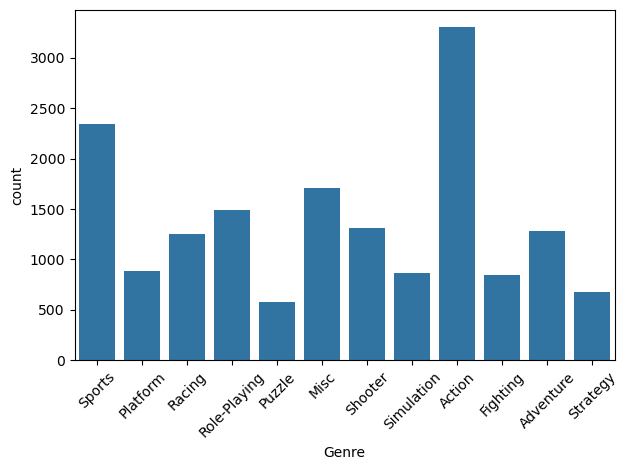

In [63]:
sns.countplot(data=vgs, x='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 9. Лучшие игры за 5 лет выпуска по жанрам

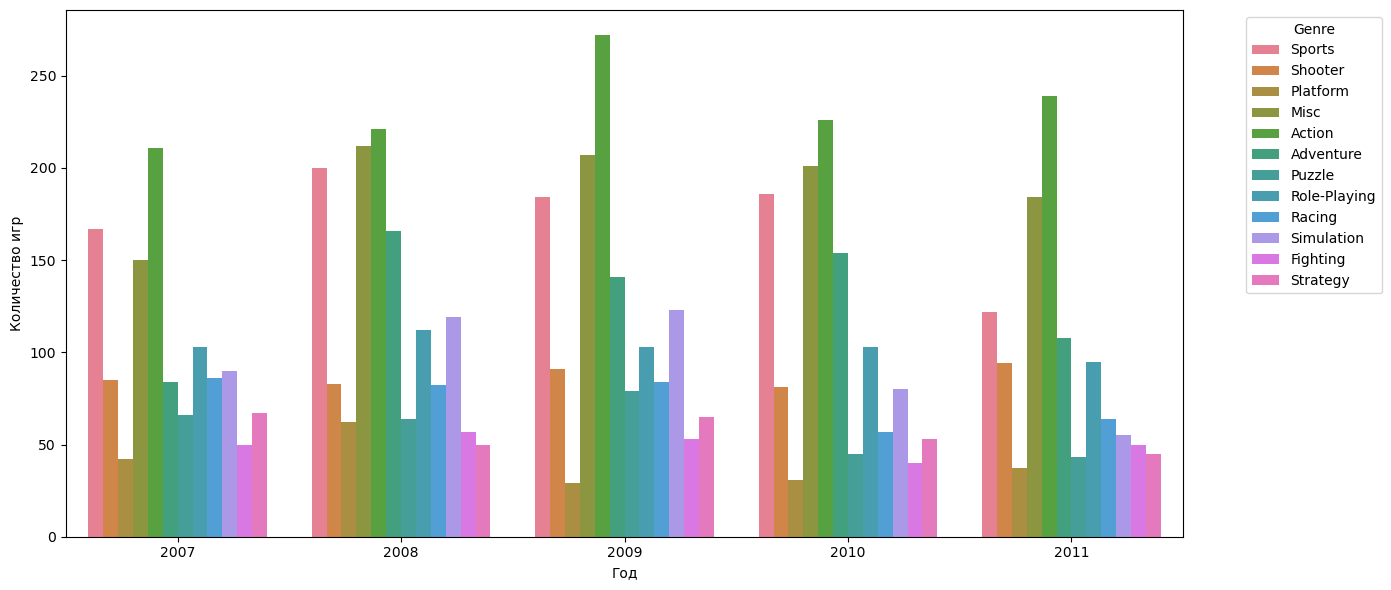

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

years_5 = [2007, 2008, 2009, 2010, 2011]

vgs_5y = vgs[vgs['Year'].isin(years_5)]

plt.figure(figsize=(14, 6))
sns.countplot(data=vgs_5y, x='Year', hue='Genre')

plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 10.  В каком году были самые высокие продажи по всему миру?¶

In [74]:
data_year = vgs.groupby('Year')['Global_Sales'].sum().reset_index()
data_year.loc[data_year['Global_Sales'].idxmax()]

Year            2008.0
Global_Sales     678.9
Name: 28, dtype: float64

In [75]:
data_year.head(10)

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


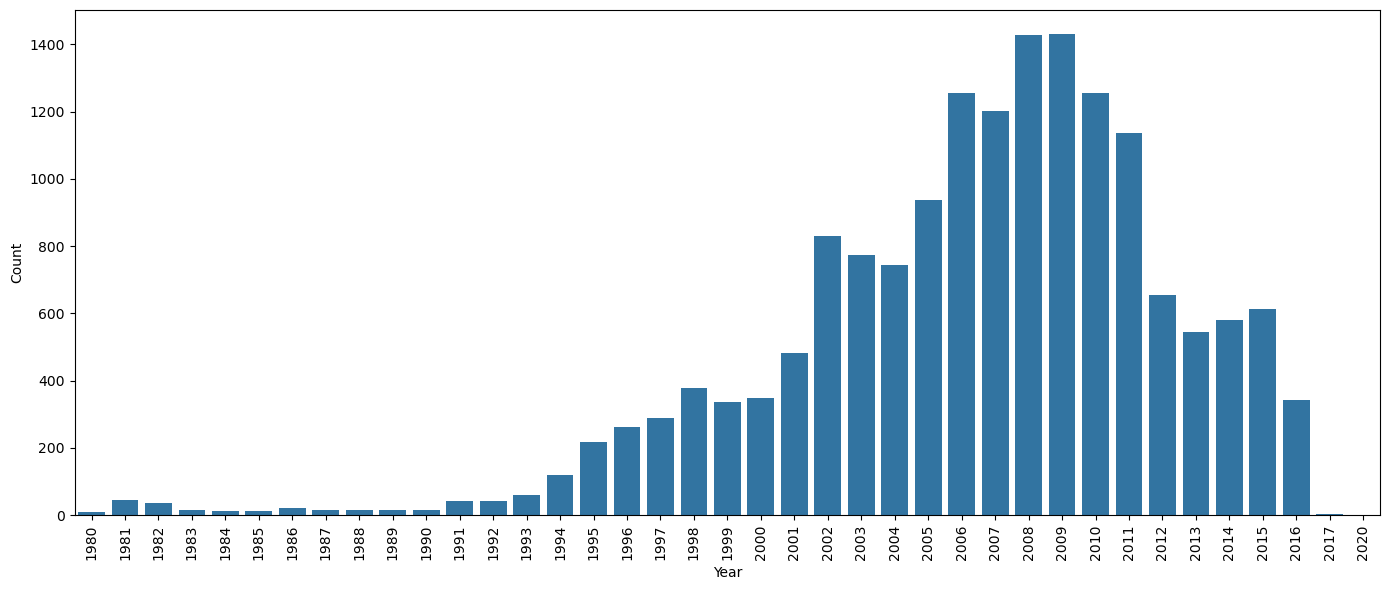

In [78]:
plt.figure(figsize=(14, 6))
sns.countplot(data=vgs, x='Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### 11. Игры какого жанра имеют самую высокую цену продажи в мире

In [89]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().reset_index()
best_genre = genre_sales.sort_values('Global_Sales', ascending=False)
best_genre = best_genre.iloc[0]
print(best_genre['Genre'])

Action


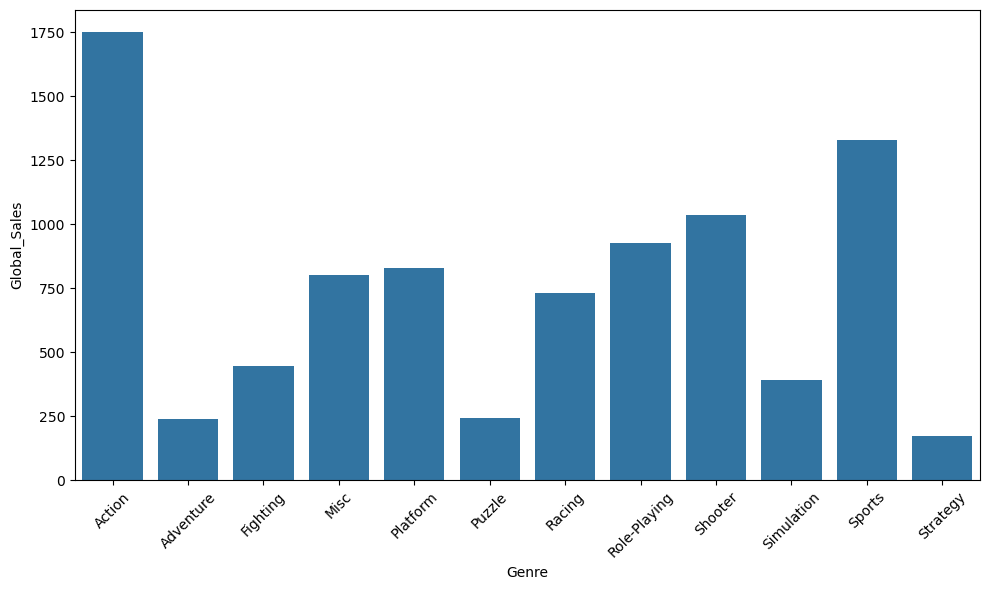

In [91]:

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_sales, x='Genre', y='Global_Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 12. На какой платформе самая высокая цена продажи в мире?

In [95]:
platform_sales = vgs.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales = platform_sales.sort_values('Global_Sales', ascending=False)
best_platform = platform_sales.iloc[0]
print(best_platform['Platform'])


PS2


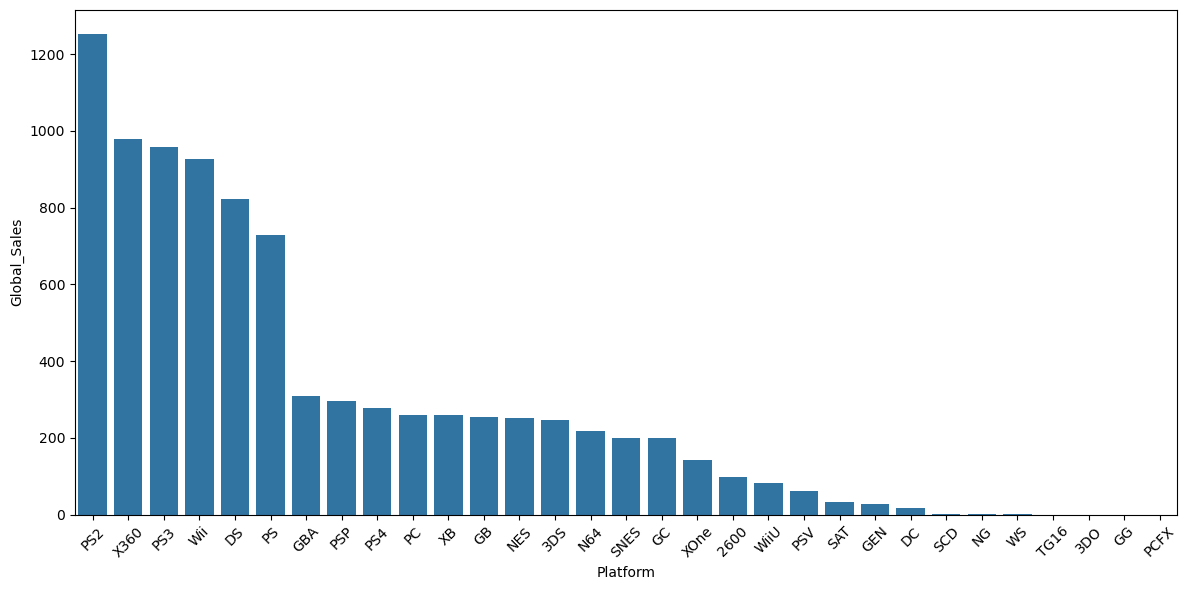

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales, x='Platform', y='Global_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 13. Выведите топ 20 Publisher

In [110]:
top20 = (
    vgs['Publisher']
    .value_counts()
    .head(20)
    .reset_index()
)

top20.columns = ['Publisher', 'Count']  # переименуем столбцы
print(top20.head(20))


                                 Publisher  Count
0                          Electronic Arts   1351
1                               Activision    975
2                       Namco Bandai Games    932
3                                  Ubisoft    921
4             Konami Digital Entertainment    832
5                                      THQ    715
6                                 Nintendo    703
7              Sony Computer Entertainment    683
8                                     Sega    639
9                     Take-Two Interactive    413
10                                  Capcom    381
11                                   Atari    363
12                              Tecmo Koei    338
13                             Square Enix    233
14  Warner Bros. Interactive Entertainment    232
15              Disney Interactive Studios    218
16                                 Unknown    203
17                            Midway Games    198
18                       Eidos Interactive    198


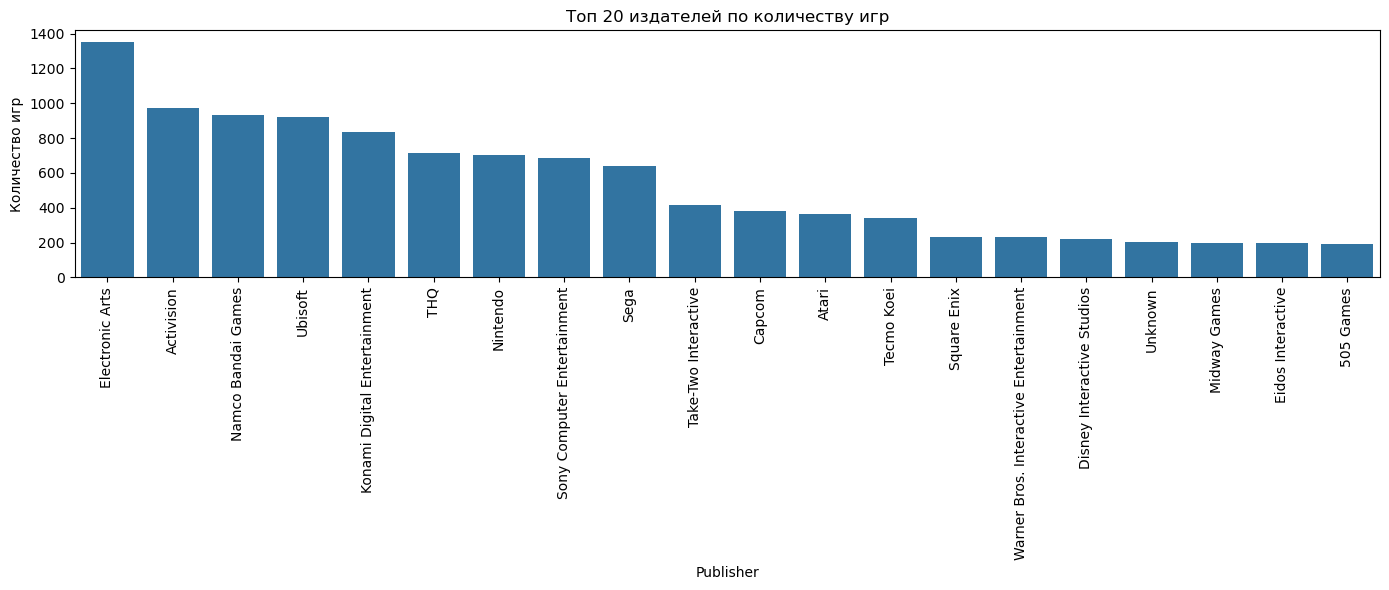

In [111]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top20, x='Publisher', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Количество игр')
plt.title('Топ 20 издателей по количеству игр')
plt.tight_layout()
plt.show()


#### 14. Общий доход по регионам

In [131]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

region_sales = (
    vgs[regions]
    .sum()
    .reset_index()
    .rename(columns={'index': 'region', 0: 'sale'})
)

print(region_sales)


        region     sale
0     NA_Sales  4384.41
1     EU_Sales  2429.45
2     JP_Sales  1290.09
3  Other_Sales   797.08


<Axes: xlabel='region'>

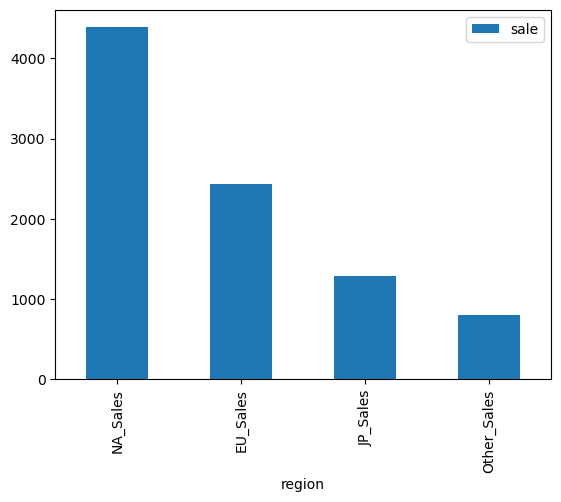

In [132]:
region_sales.plot(kind='bar', x='region', y='sale')

In [ ]:
cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr = vgs[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()


### 15.Pair plot

In [129]:
sns.pairplot(vgs[['Year','Platform','Genre','NA_Sales','EU_Sales','Other_Sales']], hue='Genre', diag_kind='hist', corner=True); plt.show()

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


In [ ]:
sns.pairplot(vgs[['Year','NA_Sales','EU_Sales','Other_Sales','Genre']], hue='Genre', diag_kind='hist', corner=True); plt.show()


#### 16. Выведите 3 самых распространенных жанра видеоигр в мире

In [130]:
vgs['Genre'].value_counts().head(3)

Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

### 17. В названиях скольких видеоигр есть слово «super» ??

In [128]:
unique_names = vgs['Name'].drop_duplicates()
count_super = unique_names.str.contains('super', case=False, na=False).sum()


In [127]:
print(count_super) 


281
